# Arabic Sentiment Analysis

## Overview

Sentiment analysis, also known as opinion mining, is a subfield of natural language processing (NLP) that involves using computational methods to extract and analyze subjective information from textual data. The goal of sentiment analysis is to determine the overall sentiment or opinion expressed in a piece of text, whether it is positive, negative, or neutral.

Types of sentiment analysis:

- Document-level sentiment analysis: This involves analyzing the sentiment of an entire document, such as a news article, movie review, or customer feedback.

- Sentence-level sentiment analysis: This involves analyzing the sentiment of individual sentences within a document.

- Aspect-based sentiment analysis: This involves analyzing the sentiment of specific aspects or features of a product or service, such as the battery life of a smartphone or the customer service of a hotel.

There is a research gap for multilevel sentiment analysis

Sentiment analysis involves different research tasks, such as polarity classification, intensity classification and emotion identification. Polarity classification attempts to classify texts into positive or negative. The intensity classification (or rating inference) task goes a step further and tries to identify different degrees of positivity and negativity, for example, strongly negative, negative, fair, positive and strongly positive. Finally, the emotion identification task seeks to identify the specific emotion (e.g. sadness and fear) that best reflects the meaning of the text.

Existing sentiment analysis approaches can currently be divided into three categories: lexicon-based methods, machine learning approaches, and hybrid approaches:

- Lexicon-based approach: This approach involves using a pre-defined set of positive and negative words, or a sentiment lexicon, to assign a sentiment score to a piece of text based on the presence or absence of these words.

- Machine learning-based approach: This approach involves training a machine learning model on a labeled dataset of text and sentiment scores to predict the sentiment of new text. Examples of machine learning algorithms used for sentiment analysis include Naive Bayes, Support Vector Machines (SVMs), and Recurrent Neural Networks (RNNs).

- Hybrid approach: This approach combines the strengths of the lexicon-based and machine learning-based approaches to improve sentiment analysis accuracy. For example, the sentiment scores generated by a lexicon-based approach can be used to augment the predictions of a machine learning model, or the results of a machine learning model can be used to update the sentiment lexicon.

The machine learning approach is dependent on the availability of training data, which is often difficult to get, due in part to the novelty of the task. The lexicon-based technique, on the other hand, necessitates a significant number of linguistic resources and frequently yields lower recall since it relies on the presence of the lexicon's words in the document to establish the polarity of opinion.


## Arabic SA challenges

Arabic sentiment analysis faces several challenges, including:

- Morphological complexity: Arabic is a highly inflected language with complex morphological rules, making it difficult to parse and analyze.

- Dialectal variation: Arabic has a wide range of dialects, each with its own vocabulary, grammar, and syntax, making it challenging to develop sentiment analysis models that work well across all dialects.

- Lack of resources: Compared to other languages, Arabic has relatively few labeled datasets and lexicons available for sentiment analysis, making it challenging to train accurate models.

- Subjectivity: Arabic has a rich poetic and rhetorical tradition, with many expressions and idioms that are highly subjective and context-dependent, making it challenging to develop sentiment analysis models that can capture the nuances of meaning.

- Code-switching: Arabic speakers often code-switch between Arabic and other languages, such as English or French, making it challenging to analyze sentiment in mixed-language texts.

- Noise in social media: Arabic sentiment analysis on social media platforms faces additional challenges due to the prevalence of slang, abbreviations, misspellings, and non-standard Arabic dialects.

## Case Study 4

Implementation of ASA using different sentiment approaches and comparing between these approaches.

### Import the necessary libraries

In [1]:
import csv
import nltk
import pandas as pd
import numpy as np
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('arabic')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Read and preprocess The Data

ASAD An Arabic dataset is created from Arabic Saudi tweets and is manully labelled according to the polarity that each tweet conveys (positive 1, negative 0).

The dataset link: https://www.kaggle.com/datasets/snalyami3/arabic-sentiment-analysis-dataset-ss2030-dataset

In [2]:
# Load CSV file
df = pd.read_csv('C:/Users/Salma/Downloads/NLP/Lab 05/Arabic Sentiment Analysis Dataset - SS2030.csv', encoding='utf-8')
df

,text,Sentiment
0,حقوق المرأة 💚💚💚 https://t.co/Mzf90Ta5g1,1
1,RT @___IHAVENOIDEA: حقوق المرأة في الإسلام. ht...,1
2,RT @saud_talep: Retweeted لجنة التنمية بشبرا (...,1
3,RT @MojKsa: حقوق المرأة التي تضمنها لها وزارة ...,1
4,RT @abm112211: ولي امر الزوجة او ولي الزوجة او...,1
...,...,...
4247,#غرد_بحبك_لمحمد_بن_سلمان ❤️,1
4248,#غرد_بحبك_لمحمد_بن_سلمان \n محمدبن سلمان احبه ...,1
4249,#غرد_بحبك_لمحمد_بن_سلمان \n الله يحفظك يا ذخر ...,1
4250,#غرد_بحبك_لمحمد_بن_سلمان \n \n الله يحفظه ويحم...,1


In [3]:
# Preprocess the data
def preprocess_tweets(text):
    # Remove URLs
    text = re.sub(r"http\S+", "", text)

    # Remove hashtags and usernames
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"#\S+", "", text)
    text = re.sub(r"\n", "", text)
    
    # remove English letters
    text = re.sub(r'[A-Za-z]', '', text)
    
    
    # remove punctuations and special characters
    text = re.sub(r'[{}]+'.format(string.punctuation), '', text)
    
    # remove extra spaces    
    text = re.sub(r'\s+', ' ', text)
    
    # Remove emojis 
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642" 
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove HTML tags
    html_pattern = re.compile('<.*?>')
    text = html_pattern.sub(r'', text)
    
    # Normalization 
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    
    text = ' '.join(word for word in text.split() if word not in stop_words)


    return text

In [4]:
df['text'] = df['text'].apply(preprocess_tweets)
df

,text,Sentiment
0,حقوق المراه,1
1,حقوق المراه الاسلام,1
2,لجنه التنميه بشبرا زال التسجيل مستمر دوره حقوق...,1
3,حقوق المراه تضمنها وزاره العدل,1
4,ولي امر الزوجه او ولي الزوجه او ولي المراه الا...,1
...,...,...
4247,,1
4248,محمدبن سلمان احبه الله واختاره لوقت لشيءً يعلم...,1
4249,الله يحفظك ذخر الوطن ويخليك,1
4250,الله يحفظه ويحميه ويقويه وكلنا معه,1


In [5]:
df['Sentiment'].value_counts()

1    2436
0    1816
Name: Sentiment, dtype: int64

### Extract The features and apply the classifier (Corpus based approach)

- Effective for sentiment analysis on formal documents, such as product reviews, news articles, and surveys.
- Suitable for sentiment analysis in languages where there is a large amount of text data available for training a corpus-based model.
- Works well for sentiment analysis across a range of domains, as it can learn the sentiment from the data itself without being constrained by a fixed sentiment lexicon.

In [6]:
# splitting the data into target and feature
feature = df.text
target = df.Sentiment

In [7]:
# splitting into train and tests
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size =.2, random_state=100)


In [8]:
# make pipeline
pipe = make_pipeline(TfidfVectorizer(),
                    LogisticRegression(max_iter=10000))

In [9]:
# make param grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

In [10]:
# create and fit the model
model = GridSearchCV(pipe, param_grid, cv=5)
model.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [11]:
import matplotlib.pyplot as plt
from sklearn import metrics

def plot_confusion_matrix(prediction, model_type):
    cm = confusion_matrix(Y_test, prediction)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Positive', 'Negative'])
    cm_display.plot()

    plt.title('Confusion Matrix for %s Model' %(model_type))

    plt.show()

In [12]:
# make prediction and print accuracy
prediction = model.predict(X_test)
print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(Y_test, prediction))

Accuracy score is 0.85
              precision    recall  f1-score   support

           0       0.86      0.77      0.82       359
           1       0.85      0.91      0.88       492

    accuracy                           0.85       851
   macro avg       0.85      0.84      0.85       851
weighted avg       0.85      0.85      0.85       851



Accuracy score for the corpus approach is 0.85


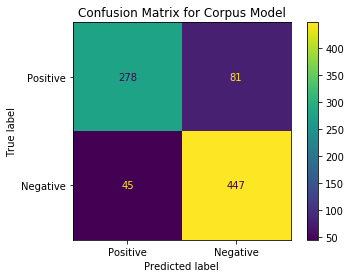

In [14]:
#plot the Corpus model
print(f"Accuracy score for the corpus approach is {accuracy_score(Y_test, prediction):.2f}")
plot_confusion_matrix(prediction, 'Corpus')

### Lexicon based approach

- Good for sentiment analysis on social media, where the data is short and informal and contains slang and idioms.
- Useful for sentiment analysis in languages where there is limited text data available for training a corpus-based model.
- Ideal for domain-specific sentiment analysis, as it allows you to customize the sentiment lexicon based on the domain.

The Arabic lexicon used in this case study is AraSenti-lexicon which constructed by King Saud University, it is a Sentiment lexicon generated from Arabic tweets and a corpus of Arabic tweets in the Saudi dialect annotated with one label: mixed.

204792 word

Lexicon Link: https://github.com/nora-twairesh/AraSenti

In [16]:
# Load the sentiment lexicon
sentiment_lexicon = {}
with open('C:/Users/Salma/Downloads/NLP/AraSenti-master/AraSentiLexiconV1.0', 'r', encoding='windows-1256') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        word = row[0].split()[0]
        score  = float(row[0].split()[1])
        if score >= 0:
            pos_score = score
            neg_score = 1.0 - score
        else:
            pos_score = abs(score)
            neg_score = 1.0 - abs(score)
        sentiment_lexicon[word] = (pos_score, neg_score)

In [17]:
sentiment_lexicon

{'لا': (0.04248362442305842, 0.9575163755769416),
 'ما': (0.10223116574974424, 0.8977688342502558),
 'الله': (0.017286439349574745, 0.9827135606504253),
 'بس': (0.3566740458634549, 0.643325954136545),
 'ممتاز': (1.0, 0.0),
 'اللي': (0.03533764284214553, 0.9646623571578544),
 'كم': (0.22692467950300155, 0.7730753204969985),
 'الخير': (1.0, 0.0),
 'مش': (0.6612365190749365, 0.3387634809250635),
 'جيد': (1.0, 0.0),
 'رائع': (1.0, 0.0),
 'لو': (0.1281770551098024, 0.8718229448901976),
 'صباح': (3.5370926349841416, -2.5370926349841416),
 'كان': (0.340201403058818, 0.6597985969411819),
 'النجاح': (1.0, 0.0),
 'فرح': (1.0, 0.0),
 'لكن': (0.6651052560429768, 0.33489474395702323),
 'جدا': (0.019628661401950607, 0.9803713385980494),
 'او': (0.22204494732999405, 0.777955052670006),
 'اذا': (0.18414443119915438, 0.8158555688008456),
 'يوم': (0.10555917179565968, 0.8944408282043403),
 'ده': (1.2548620831323312, -0.25486208313233116),
 'يعني': (0.08992272880565179, 0.9100772711943482),
 'ايه': (0.86

In [18]:
def lexicon_sentiment_approach(text):
    pos_sentiment = 0
    neg_sentiment = 0
    words = word_tokenize(text)
    for word in words:
        if word in sentiment_lexicon:
            pos_score, neg_score = sentiment_lexicon[word]
            pos_sentiment += pos_score
            neg_sentiment += neg_score

    sentiment_score = pos_sentiment - neg_sentiment

    # Determine the sentiment
    if sentiment_score > 0:
        sentiment = 1
    else:
        sentiment = 0

    return sentiment

In [19]:
# Test the lexicon approach
lexicon_results = []
for text in X_test:
    predicted_sentiment = lexicon_sentiment_approach(text)
    lexicon_results.append(predicted_sentiment)

In [20]:
print(f"Accuracy score for the lexicon approach is {accuracy_score(Y_test, lexicon_results):.2f}")
print(classification_report(Y_test, lexicon_results))

Accuracy score for the lexicon approach is 0.54
              precision    recall  f1-score   support

           0       0.32      0.08      0.13       359
           1       0.57      0.87      0.69       492

    accuracy                           0.54       851
   macro avg       0.44      0.48      0.41       851
weighted avg       0.46      0.54      0.45       851



Accuracy score for the lexicon approach is 0.54


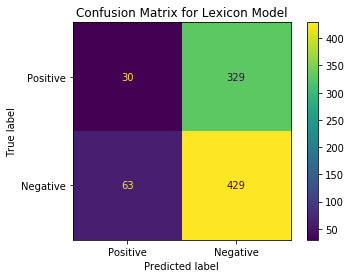

In [22]:
#plot the lexicon model
print(f"Accuracy score for the lexicon approach is {accuracy_score(Y_test, lexicon_results):.2f}")
plot_confusion_matrix(lexicon_results, 'Lexicon')

In [23]:
# test the lexicon on data outside of the corpus
input_texts = ["الاكل كان سئ للغاية و غالي","هذا الكتاب رائع ويستحق القراءة", "كدا أدينا القط مفتاح القرار" , "ما ينفع مع هالموظفين اللي ما يعرفون يخدمون الناس، طول الوقت يطلبون منك التأخير وما يتحركون إلا إذا قلت لهم إنك راح تشتكي", "المطعم هاد لسا ما شفت فيه أسوأ منو، بس ما عجبني كتير", "المكان ده مش هو الأفضل، بس ممكن تجيب حاجات كويسة فيه"]

for sentence in input_texts:
    print("The sentence", sentence)
    sentiment_code = lexicon_sentiment_approach(sentence)
    if sentiment_code == 1:
        sentiment = 'Positive'
    else:
        sentiment = 'Negative'
    print("The sentiment of the sentence is %s " %(sentiment))

The sentence الاكل كان سئ للغاية و غالي
The sentiment of the sentence is Negative 
The sentence هذا الكتاب رائع ويستحق القراءة
The sentiment of the sentence is Positive 
The sentence كدا أدينا القط مفتاح القرار
The sentiment of the sentence is Positive 
The sentence ما ينفع مع هالموظفين اللي ما يعرفون يخدمون الناس، طول الوقت يطلبون منك التأخير وما يتحركون إلا إذا قلت لهم إنك راح تشتكي
The sentiment of the sentence is Negative 
The sentence المطعم هاد لسا ما شفت فيه أسوأ منو، بس ما عجبني كتير
The sentiment of the sentence is Negative 
The sentence المكان ده مش هو الأفضل، بس ممكن تجيب حاجات كويسة فيه
The sentiment of the sentence is Positive 


### Hybrid based approach

In [25]:
def voting_hybrid(test_data):
    
    lexicon_results = []
    corpus_results = []
    combined_results = []

    for text in test_data:
        # Use the lexicon approach to get the sentiment score
        lexicon_sentiment = lexicon_sentiment_approach(text)
        lexicon_results.append(lexicon_sentiment)
        # Use the corpus approach to get the sentiment score
        corpus_sentiment = model.predict([text])
        corpus_results.append(corpus_sentiment[0])

        # Combine the results using a simple voting mechanism
        if lexicon_sentiment == corpus_sentiment:
            combined_results.append(lexicon_sentiment)
        else:
            combined_results.append(1 if lexicon_sentiment == 1 or corpus_sentiment == 1 else 0)
            
    return combined_results
            

Accuracy score for the hybrid approach is 0.59


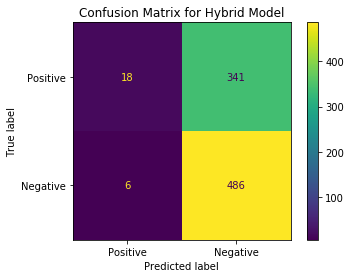

In [26]:
#plot the voting Hybrid model 
voting_results = voting_hybrid(X_test)
print(f"Accuracy score for the hybrid approach is {accuracy_score(Y_test, voting_results):.2f}")
plot_confusion_matrix(voting_results, 'Hybrid')

In [27]:
def weighted_hybrid(test_data):
    lexicon_results = []
    corpus_results = []
    combined_results = []

    for text in test_data:
        # Use the lexicon approach to get the sentiment score
        lexicon_sentiment = lexicon_sentiment_approach(text)
        lexicon_results.append(lexicon_sentiment)
        # Use the corpus approach to get the sentiment score
        corpus_sentiment = model.predict([text])
        corpus_results.append(corpus_sentiment[0])

        # Combine the results using a coeffecient weighted  mechanism
        hybrid_scores_test = (0.3 * lexicon_sentiment) + (0.7 * model.predict_proba([text])[:, 1])
        hybrid_results = np.where(hybrid_scores_test[0] > 0.5, 1, 0)
        combined_results.append(hybrid_results)
    return combined_results

Accuracy score for the hybrid approach is 0.80


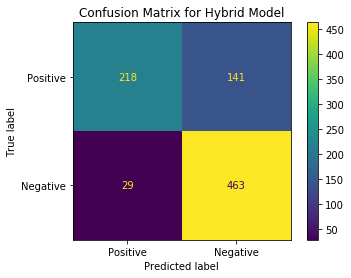

In [28]:
#plot the coeffecient weighted Hybrid model 
w_results = weighted_hybrid(X_test)
print(f"Accuracy score for the hybrid approach is {accuracy_score(Y_test, w_results):.2f}")
plot_confusion_matrix(w_results, 'Hybrid')

## Conclusion

The reasons why the corpus-based approach may perform better than the lexicon or hybrid approaches in certain cases are:

- Corpus-based models can capture context-dependent meanings of words. In contrast, lexicon-based models rely on pre-defined lists of words and their polarities, which may not be comprehensive or nuanced enough to handle all cases.

- Corpus-based models can handle negations and modifiers more effectively. For example, the word "not" can completely reverse the polarity of a sentence, which is difficult for lexicon-based models to handle.

- Corpus-based models can learn from domain-specific language and slang. In contrast, lexicon-based models may not include domain-specific terms or slang, which can affect the accuracy of sentiment classification.

We could use the lexicon to improve the classifier by pre-processing the text before feeding it to the classifier. For example, you can replace words in the text with their corresponding sentiment scores from the lexicon, or you can use the lexicon to filter out irrelevant or ambiguous words. This approach can help to reduce noise and improve the signal-to-noise ratio of the data.

We could use the high performance of the classifier to construct a good lexicon.

The automatic translation of any textual data can reduce the accuracy of sentiment analysis up to 20%

## References

- https://ieeexplore.ieee.org/document/6716448
- https://medium.com/@madjidmain/how-to-implement-sentiment-analysis-on-arabic-using-python-22141db5bd92
- https://www.geeksforgeeks.org/make_pipeline-function-in-sklearn/
- https://towardsdatascience.com/arabic-sentiment-analysis-5e21b77fb5ea
- https://www.researchgate.net/publication/323382775_A_Hybrid_Approach_of_Lexicon-based_and_Corpus-based_Techniques_for_Arabic_Book_Aspect_and_Review_Polarity_Detection
- https://arxiv.org/ftp/arxiv/papers/1506/1506.01906.pdf
- https://journals.sagepub.com/doi/10.1177/0165551516683908
- https://www.researchgate.net/publication/273948341_Sentiment_Analysis_for_Dialectical_Arabic
- https://journals.sagepub.com/doi/10.1177/0165551514534143
- https://www.goglobal-consulting.com/cultural-nuances-and-sentiment-analysis-a-contribution-of-the-language-industry-to-global-marketing/
- https://github.com/topics/arabic-sentiment